In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
from sklearn.ensemble import RandomForestRegressor
combi = pd.read_table('Historical_combi2.csv',delimiter =';')

combi=combi.fillna(0)


from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

from sklearn import linear_model
import statsmodels.api as sm

In [ ]:
# Ask for input
query =input(print("Enter main query first, follow by ',' and no space after ','"))


In [ ]:
query_s = query.split(',')

In [39]:
plotx =input()


Dubai


In [240]:
#s = combi[query_s]

#s_s = s.iloc[:,0]
#k=s_s.iloc[s_s.to_numpy().nonzero()[0]]
#np.min(k.index.values)

93

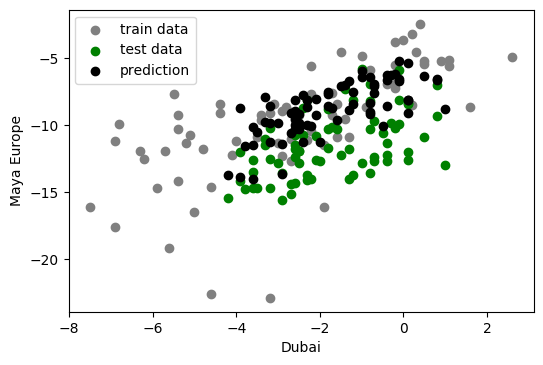

Mean squared error: 0.36
Feature ranking:
Feature Dated Brent (0.012535)
Feature Bonny light (0.009832)
Feature Mars (0.073848)
Feature WTI (0.006305)
Feature ESPO (0.002189)
Feature Urals NWE (0.020146)
Feature Urals MED (0.017898)
Feature Dubai (0.062853)
Feature LLS (0.010959)
Feature Propane (0.004487)
Feature Gasoline (0.004692)
Feature Jet (0.024641)
Feature Gasoil (0.025188)
Feature FO 1% (0.019170)
Feature ULSD (0.018513)
Feature Naphtha (0.006074)
Feature Butane (0.007324)
Feature FO 3.5% (0.665796)
Feature VGO 0.5% (0.003946)
Feature FO 0.5% (0.000000)
Feature VGO 2% (0.003603)


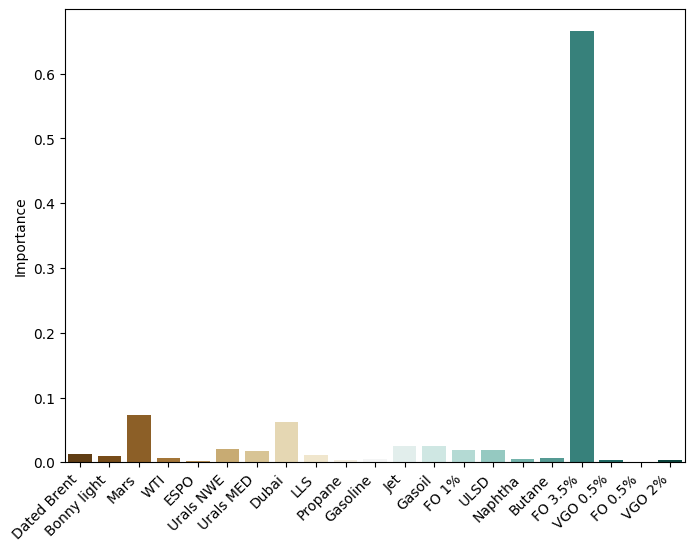

In [241]:
ss = combi[query_s]

s_s = s.iloc[:,0]
k=s_s.iloc[s_s.to_numpy().nonzero()[0]]
first = np.min(k.index.values)

half = int((236 - first)/2)

train_combi = combi.iloc[first:first+half,1:]
test_combi = combi.iloc[first+half:,1:]

plt.rcParams['figure.dpi'] = 100

x_train=train_combi.drop(query_s,axis=1)
y_train=train_combi[query_s[0]]

#df.drop('b', axis=1)


x_test=test_combi.drop(query_s,axis=1)
y_test=test_combi[query_s[0]]
#y_test=test_combi[query_s].to_frame()

regressor = RandomForestRegressor(n_estimators=200, max_depth=5)

clf=regressor.fit(x_train, y_train)

y_pred=regressor.predict(x_test)
y_pred=pd.DataFrame(y_pred)


plt_train=plt.scatter(x_train[plotx],y_train,   color='grey')
plt_test=plt.scatter(x_test[plotx],y_test,   color='green')
plt_pred=plt.scatter(x_test[plotx], y_pred,  color='black')

plt.xlabel(plotx)
plt.ylabel(query_s[0])
plt.legend((plt_train, plt_test,plt_pred),("train data", "test data","prediction"))
plt.show()

print("Mean squared error: %.2f"
      % np.mean((regressor.predict(x_train) - y_train) ** 2))

import seaborn as sns
importances=regressor.feature_importances_

indices=list(x_train)
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("Feature %s (%f)" % (indices[f], importances[f]))

f, (ax1) = plt.subplots(1, 1, figsize=(8, 6), sharex=True)
sns.barplot(indices, importances, palette="BrBG", ax=ax1)
ax1.set_ylabel("Importance")

ax1.set_xticklabels(
    ax1.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);